<a href="https://colab.research.google.com/github/JHWannabe/keras-dl/blob/main/5%EC%9E%A5_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%B0%BD%EC%8B%9C%EC%9E%90%EC%97%90%EA%B2%8C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

### 코드 5-1 MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

### 코드 5-2 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [3]:
from tensorflow import keras 
from tensorflow.keras import layers  

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model 
 
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)  

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 34ms/step - loss: 0.6292 - accuracy: 0.8103 - val_loss: 0.3198 - val_accuracy: 0.9030
Epoch 2/10
375/375 [==============================] - 12s 33ms/step - loss: 0.2512 - accuracy: 0.9237 - val_loss: 0.2091 - val_accuracy: 0.9365
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1626 - accuracy: 0.9499 - val_loss: 0.1511 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 8s 20ms/step - loss: 0.1144 - accuracy: 0.9637 - val_loss: 0.1577 - val_accuracy: 0.9524
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.1897 - val_accuracy: 0.9470
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0611 - accuracy: 0.9804 - val_loss: 0.1467 - val_accuracy: 0.9581
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.1414 - val_accuracy: 0.96

### 코드 5-3 검증 정확도 비교 그래프 그리기

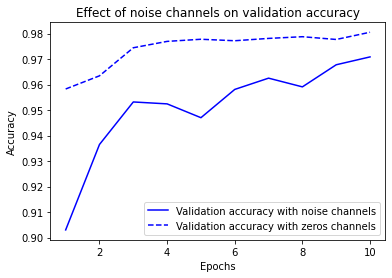

In [4]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 코드 5-4 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255   

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)  

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 10ms/step - loss: 2.3164 - accuracy: 0.1039 - val_loss: 2.3066 - val_accuracy: 0.1014
Epoch 2/100
375/375 [==============================] - 4s 9ms/step - loss: 2.2997 - accuracy: 0.1157 - val_loss: 2.3111 - val_accuracy: 0.1004
Epoch 3/100
375/375 [==============================] - 4s 9ms/step - loss: 2.2907 - accuracy: 0.1286 - val_loss: 2.3202 - val_accuracy: 0.1002
Epoch 4/100
375/375 [==============================] - 4s 9ms/step - loss: 2.2764 - accuracy: 0.1415 - val_loss: 2.3329 - val_accuracy: 0.1008
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2597 - accuracy: 0.1545 - val_loss: 2.3394 - val_accuracy: 0.1039
Epoch 6/100
375/375 [==============================] - 4s 9ms/step - loss: 2.2374 - accuracy: 0.1696 - val_loss: 2.3611 - val_accuracy: 0.0956
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2133 - accuracy: 0.1846 - val_loss: 2.3694 - val_accuracy: 0.096

### 코드 5-5 홀드아웃 검증 구현 예